# Actividad 2 - Clasificación
# Universidad Europea de Madrid
Inteligencia Artificial<br>
Isabel Sutil<br>
M31<br>
Jorge Javier Castilla Coello<br>
Geronimo Basso Sosa<br>
Luis Cabello Casquete<br>
Paula Sáenz de Santa María Diez<br>
Ana Esteban González<br>




# Codigo en común utilizado por todos los apartados.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.base import clone
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer

# Apartado 0
Modificar el dataset para que cada vez que en "prec" se encuente el valor 0,0 se considere que no llueve, para los demas valores se va a considerar que si ha llovido

In [2]:
# Cargamos el fichero necesario para analizar los modelos.
ruta_archivo = 'valores-climatologicos.csv'
dataframe = pd.read_table(ruta_archivo, sep=',')

Utilizando una función lambda, para cada valor de ´prec´cambiamos su valor a 0 si la precipitación es 0
cambiamos el valor a 1 si la precipitación es disitnto de 0. Además, creamos un mapeo de indivaticos de provincia para tener valores de tipo int en esa columna envez de strings.

In [3]:
# Convertimos la columna 'prec' a valores binarios: 0 si no llovió, 1 si llovió.
dataframe['prec'] = dataframe['prec'].apply(lambda x: '0' if x == 0.0 else '1')

# Creamos un mapeo numérico para la columna 'indicativo' utilizando un diccionario.
states = ['1387E', '1387', '1393', '1351', '1400', '1437O', '1473A', '1428', '1475X', '1505', '1484', '1484C', '1495']
state_map = {state: idx for idx, state in enumerate(sorted(set(states)))}

# Aplicamos el mapeo numérico a la columna 'indicativo'.
dataframe['indicativo'] = dataframe['indicativo'].apply(lambda x: state_map[x])

In [4]:
# Visualización de las primeras filas del dataset.
print(dataframe.head())

   indicativo  altitud  tmed prec  tmin  tmax  dir  velmedia  racha  presMax  \
0           2       98  16.9    0  12.0  21.8    1       3.1    8.3   1008.7   
1           2       98  20.5    1  12.5  28.5   22       4.7   11.7   1008.5   
2           2       98  21.4    0  17.6  25.1   22       2.2   10.3   1008.7   
3           2       98  21.4    1  16.0  26.8   99       5.3   10.8   1009.4   
4           2       98  18.6    0  15.7  21.6    4       3.9   11.7   1012.7   

   presMin  
0   1003.9  
1   1005.5  
2   1006.1  
3   1005.4  
4   1009.3  


# Apartado 1
Análisis exploratorio

In [5]:
# Verificamos si hay valores nulos en nuestro dataset.
print(dataframe.isna().any())

indicativo    False
altitud       False
tmed          False
prec          False
tmin          False
tmax          False
dir           False
velmedia      False
racha         False
presMax       False
presMin       False
dtype: bool


In [6]:
# Crear un data set especifico con valores de tipo float para que los modelos puedan entrenar mejor.
dataframe = dataframe.astype(float)

# Convertir la columna 'prec' de 'float' a 'categorical'
dataframe['prec'] = pd.Categorical(dataframe['prec'])
print(dataframe.dtypes)

indicativo     float64
altitud        float64
tmed           float64
prec          category
tmin           float64
tmax           float64
dir            float64
velmedia       float64
racha          float64
presMax        float64
presMin        float64
dtype: object


# Analisis del dataset

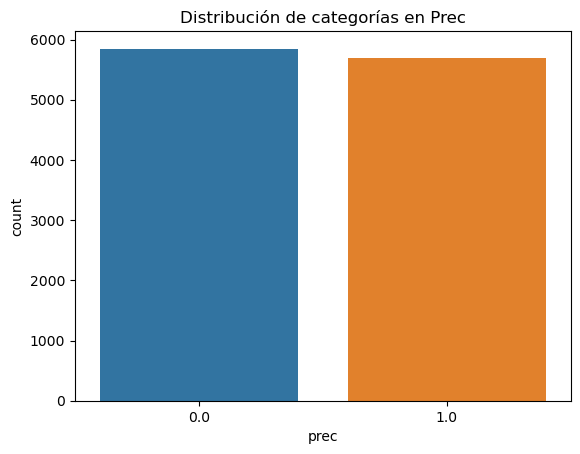

In [7]:
# Crear un gráfico de barras para la variable categórica Y
sns.countplot(x='prec', data=dataframe)

# Establecer el título del gráfico
plt.title('Distribución de categorías en Prec')

# Mostrar el gráfico
plt.show()

Con estas gráficas, modelos obsverar como el modelo deberia de ser bueno prediciendo para ambos tipos de prec o no lluvia dado que el data set esta bastante balanceado. 

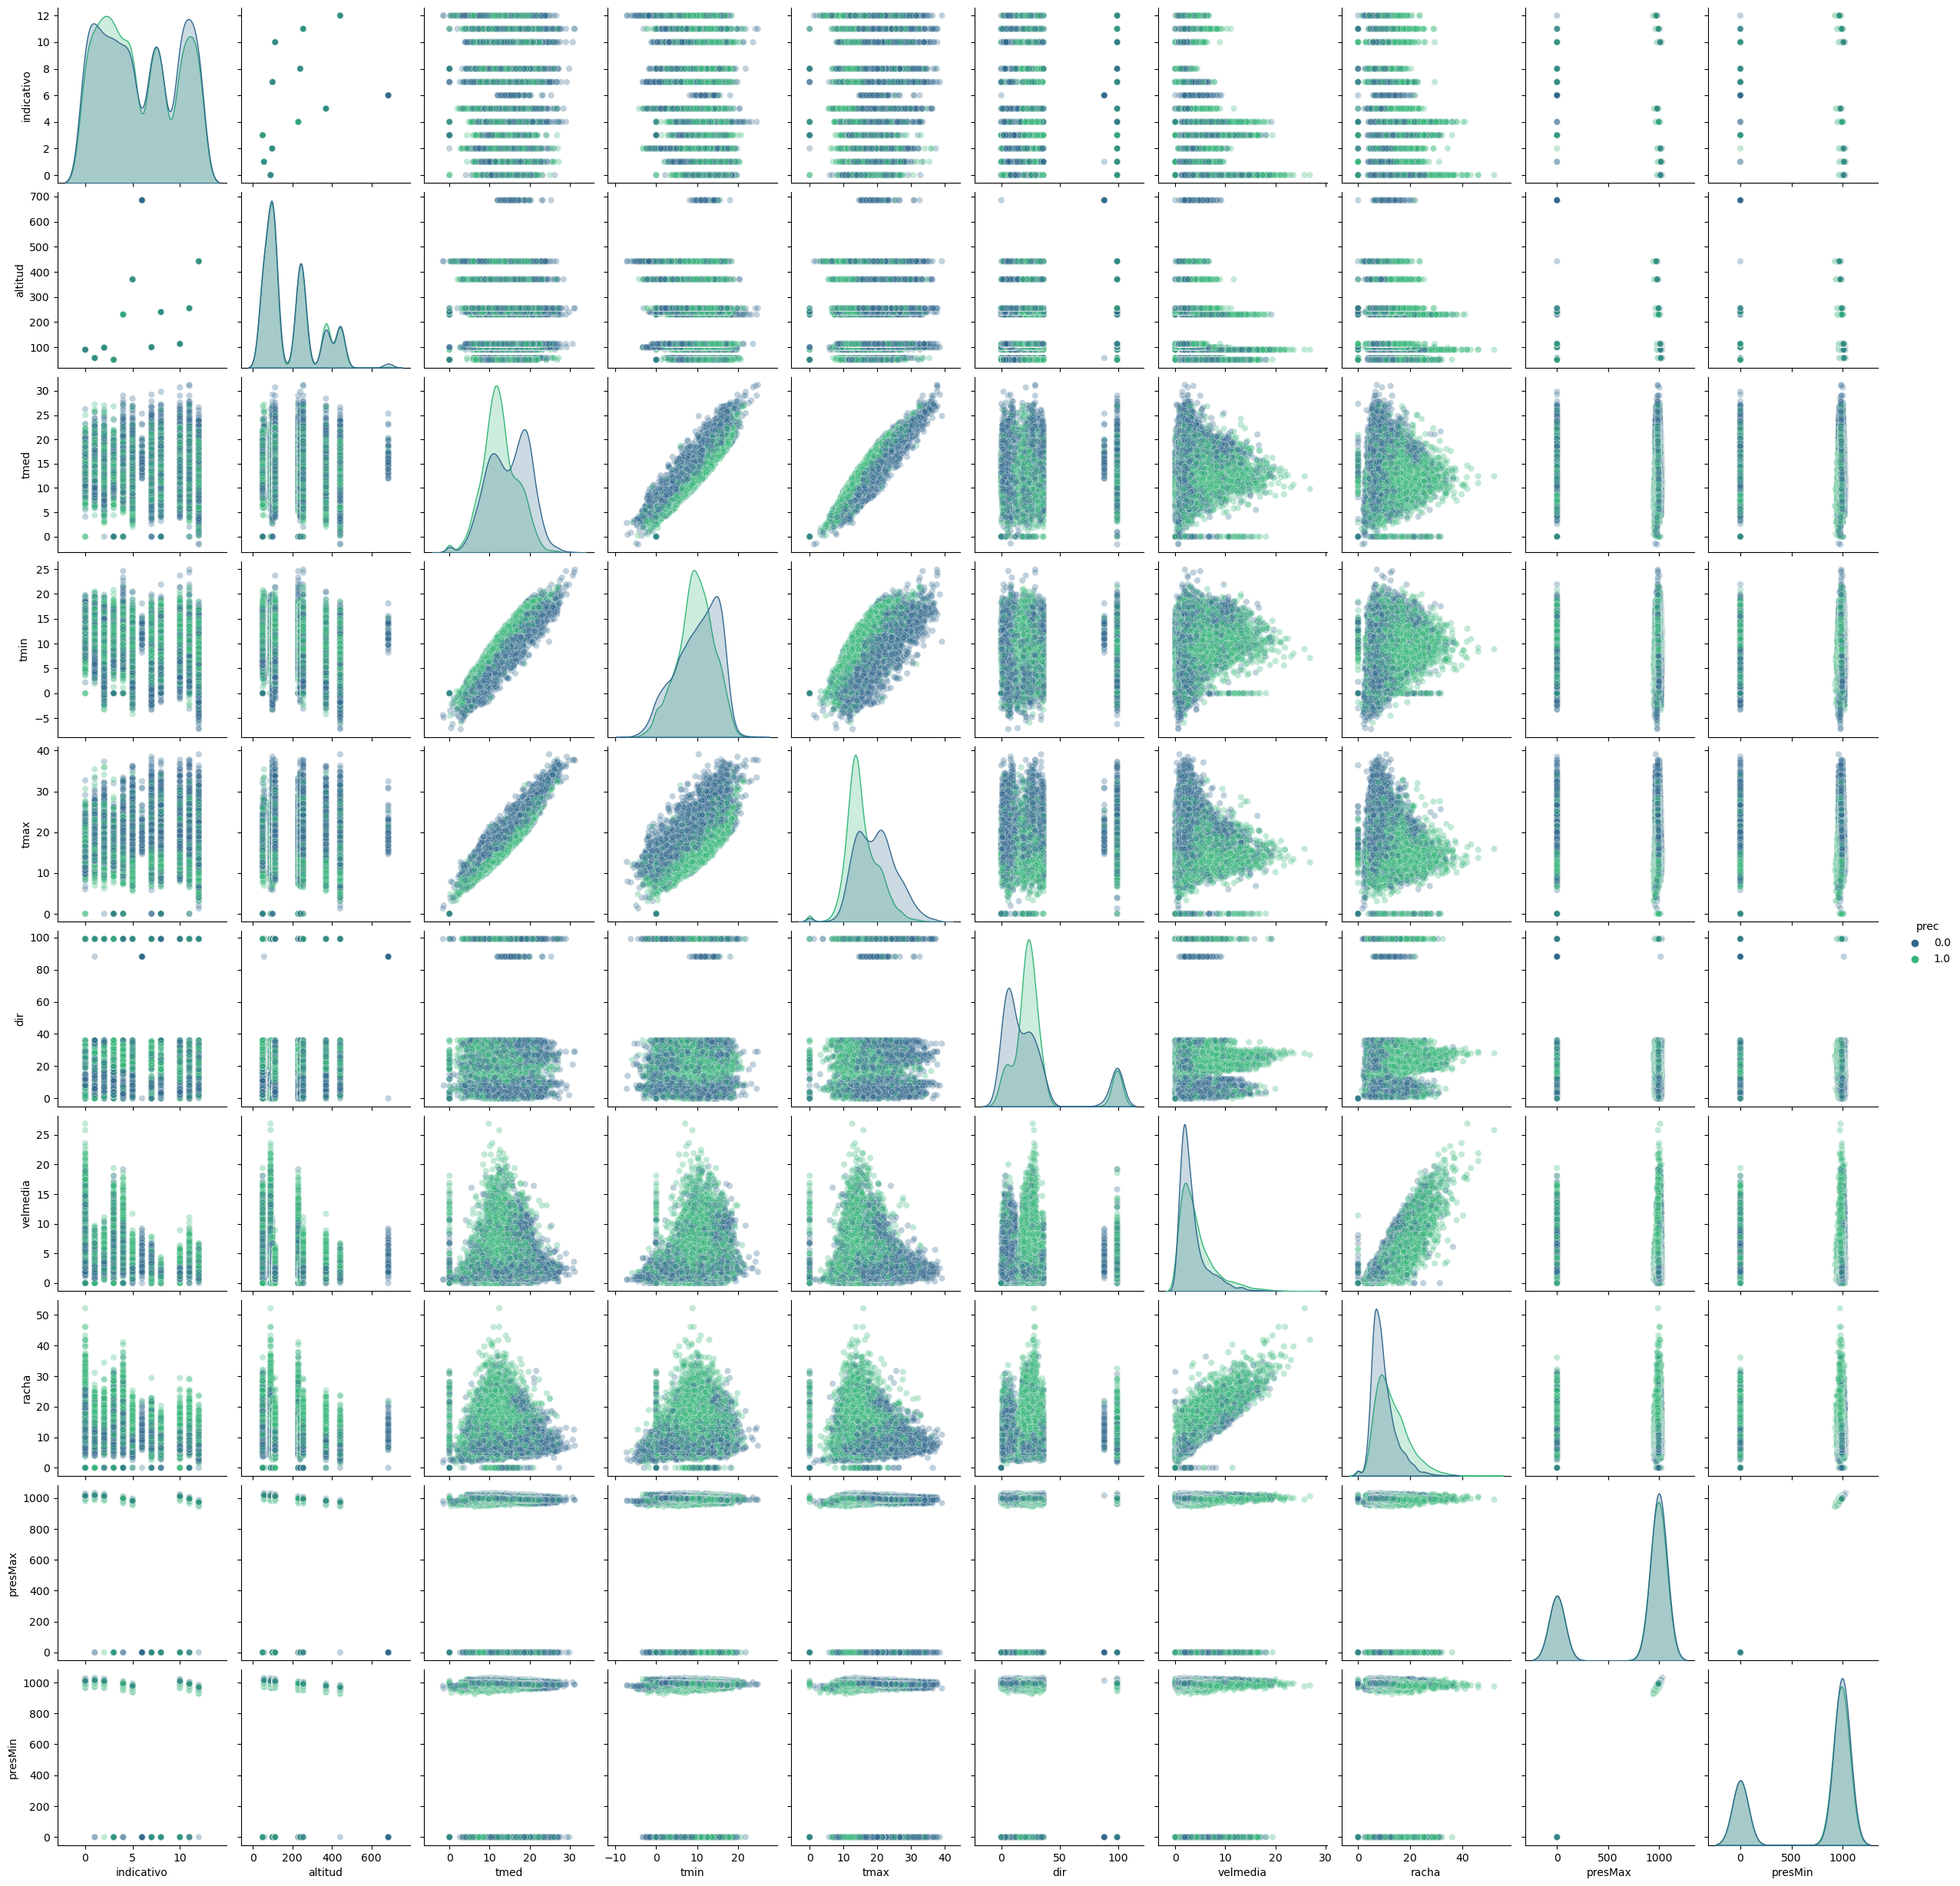

In [8]:
# Visualización de la matriz de gráficos de dispersión
sns.pairplot(dataframe, hue='prec', palette='viridis', plot_kws={'alpha': 0.3})

# Mostrar el gráfico
plt.show()

Matriz de Correlación:
            indicativo   altitud      tmed      tmin      tmax       dir  \
indicativo    1.000000  0.588561 -0.097073 -0.253368  0.048510  0.001256   
altitud       0.588561  1.000000 -0.129835 -0.241275 -0.017224  0.133139   
tmed         -0.097073 -0.129835  1.000000  0.907705  0.935410  0.032755   
tmin         -0.253368 -0.241275  0.907705  1.000000  0.700806  0.010063   
tmax          0.048510 -0.017224  0.935410  0.700806  1.000000  0.047226   
dir           0.001256  0.133139  0.032755  0.010063  0.047226  1.000000   
velmedia     -0.465549 -0.268181  0.007751  0.197663 -0.153374 -0.055892   
racha        -0.390982 -0.219487 -0.048973  0.144262 -0.204833 -0.075823   
presMax      -0.059261  0.198574  0.015606  0.026675  0.004187  0.166674   
presMin      -0.058853  0.198737  0.017080  0.027647  0.005875  0.166728   
prec         -0.018844 -0.012420 -0.231847 -0.053260 -0.349357  0.049073   

            velmedia     racha   presMax   presMin      prec  
i

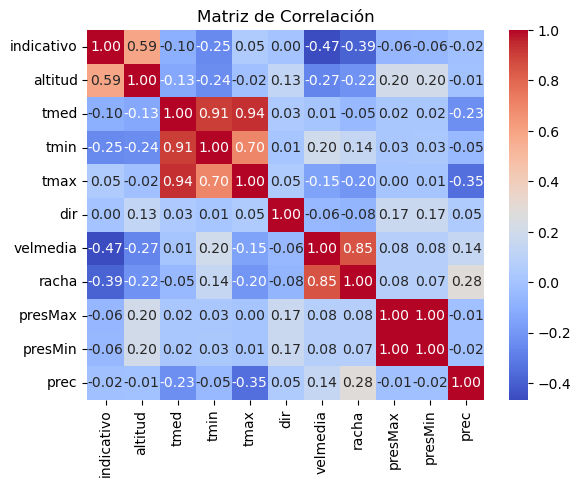

In [9]:
# Convertimos prec a float para poder hacer la matriz de correlación
dataframe = dataframe.astype(float)


# Calculamos la matriz de correlación para las variables seleccionadas
correlation_matrix = dataframe[['indicativo', 'altitud', 'tmed','tmin','tmax','dir','velmedia','racha','presMax','presMin','prec']].corr() # No podemos poner Y por que solo permite variables numericas

# Imprimir la matriz de correlación
print("Matriz de Correlación:")
print(correlation_matrix)

# Creamos un mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Añadimos un título al mapa de calor
plt.title('Matriz de Correlación')

# Mostramos la gráfica representada con colores para verla mejor
plt.show()

In [10]:
# Calcula la correlación de 'prec' con todas las demás variables del DataFrame
correlacion_con_prec = dataframe.corr()['prec']

# Imprime los resultados de la correlación
print(correlacion_con_prec)

indicativo   -0.018844
altitud      -0.012420
tmed         -0.231847
prec          1.000000
tmin         -0.053260
tmax         -0.349357
dir           0.049073
velmedia      0.143073
racha         0.280849
presMax      -0.013630
presMin      -0.015619
Name: prec, dtype: float64


Tras obtener la correlación de todas las variables comparadas a prec, podemos observar que las dos variables que son de mayor importancia para predecir si va a llover o no son las columnas "racha" y "tmax". Por lo tanto, el analsis en los modelos se realizara viendo estas dos variables dado que son las que más afectan a nuestra predicción. 